In [48]:
train_path = "../part2_Classic_classification/outputs_mlpenhanced/mlp_efficientnet_b3_1536_bs64_PCA_0.5/seed_0/train_reducedPCA_0.5.csv"
val_path = "../part2_Classic_classification/outputs_mlpenhanced/mlp_efficientnet_b3_1536_bs64_PCA_0.5/seed_0/val_reducedPCA_0.5.csv"

In [49]:
from qiskit_algorithms.utils import algorithm_globals
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from qiskit.circuit.library import ZZFeatureMap
import seaborn as sns

algorithm_globals.random_seed = 12345

In [50]:
train_embeddings =  pd.read_csv(train_path)
val_embeddings = pd.read_csv(val_path)
print(f"Reading embeddings from: ", train_path)
# Prepare data for training
train_features = train_embeddings.iloc[:, :-1].values  # Features
y_train = train_embeddings.iloc[:, -1].values   # Labels

test_features = val_embeddings.iloc[:, :-1].values      # Features
y_val = val_embeddings.iloc[:, -1].values       # Labels


Reading embeddings from:  ../part2_Classic_classification/outputs_mlpenhanced/mlp_efficientnet_b3_1536_bs64_PCA_0.5/seed_0/train_reducedPCA_0.5.csv


In [51]:
features = MinMaxScaler().fit_transform(train_features)

In [52]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [53]:
num_features = train_features.shape[1]

column_names = [f'feat_{i+1}' for i in range(num_features)]

df = pd.DataFrame(train_features, columns=column_names)
df["class"] = pd.Series(y_train)
df

feat_1    feat_2    feat_3    feat_4    feat_5    feat_6    feat_7  \
0    -0.035935 -1.171124  2.820905  3.669640 -0.375200  0.781293  2.856286   
1     2.857519  3.458781 -1.118853  0.513341 -0.311170  2.041192 -0.221987   
2    -4.009654 -0.645768 -3.549681  1.845417 -0.661524 -0.169195  0.388956   
3    -2.922033  1.758380 -0.660098 -0.401906 -0.643945 -0.942885  1.430338   
4    -0.610467 -1.098762 -0.990142 -1.954994 -3.636985 -0.858497  0.427390   
...        ...       ...       ...       ...       ...       ...       ...   
7674  0.125746 -4.430960  0.803035 -1.130237  0.352976 -2.133352  1.219210   
7675 -1.726501  0.175791 -1.788824 -3.531756  1.530421 -0.098332 -0.233837   
7676 -1.106450 -1.931096 -1.295282  4.054046  0.460566  0.788674  1.273874   
7677 -2.308109 -3.435154 -0.923265 -0.812485 -1.144974 -0.974993 -2.938803   
7678  3.144586 -1.458181  2.027673  1.254940 -0.128472 -1.195092 -3.262892   

        feat_8  class  
0     0.451230    1.0  
1    -0.917727    0.0  
2     1.039731    0.0  
3    -0.156417    1.0  
4     0.212565    1.0  
...        ...    ...  
7674  1.589133    1.0  
7675 -0.498588    2.0  
7676  0.550390    1.0  
7677  2.204416    2.0  
7678 -0.372008    2.0  

[7679 rows x 9 columns]

/home/sebastian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sebastian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sebastian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sebastian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

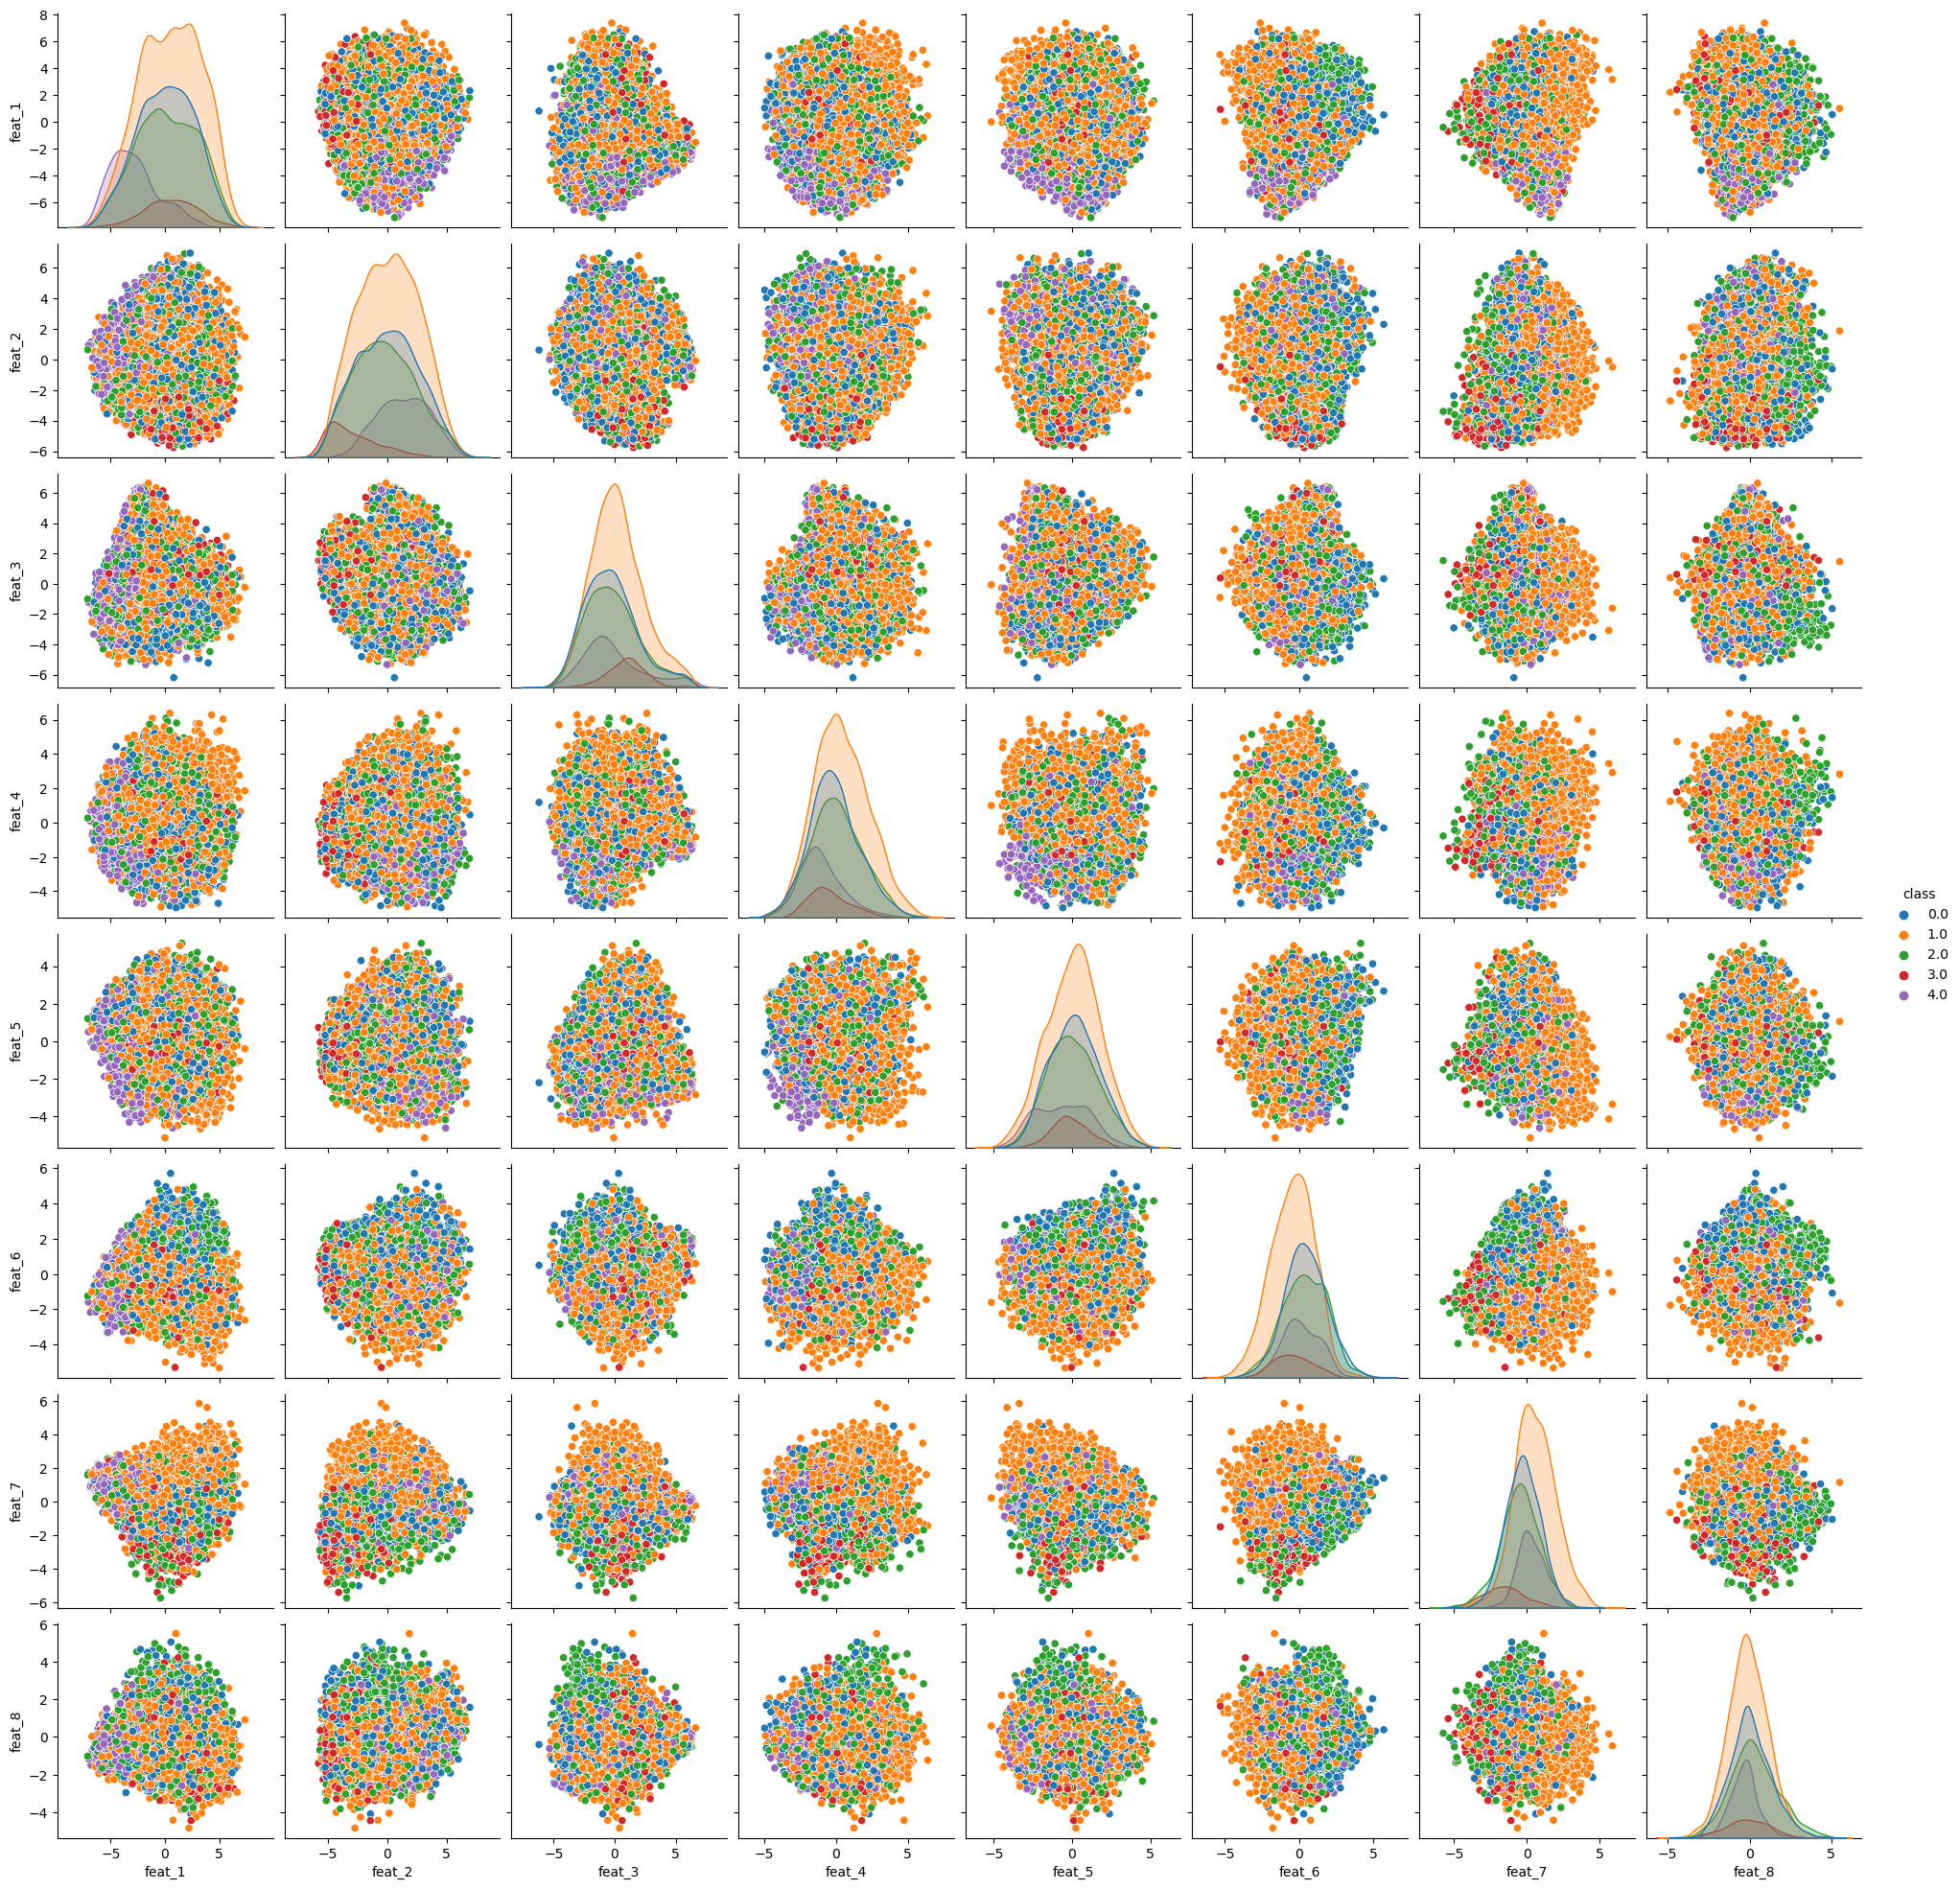

In [54]:
sns.pairplot(df, hue="class", palette="tab10")

number of features is: 8


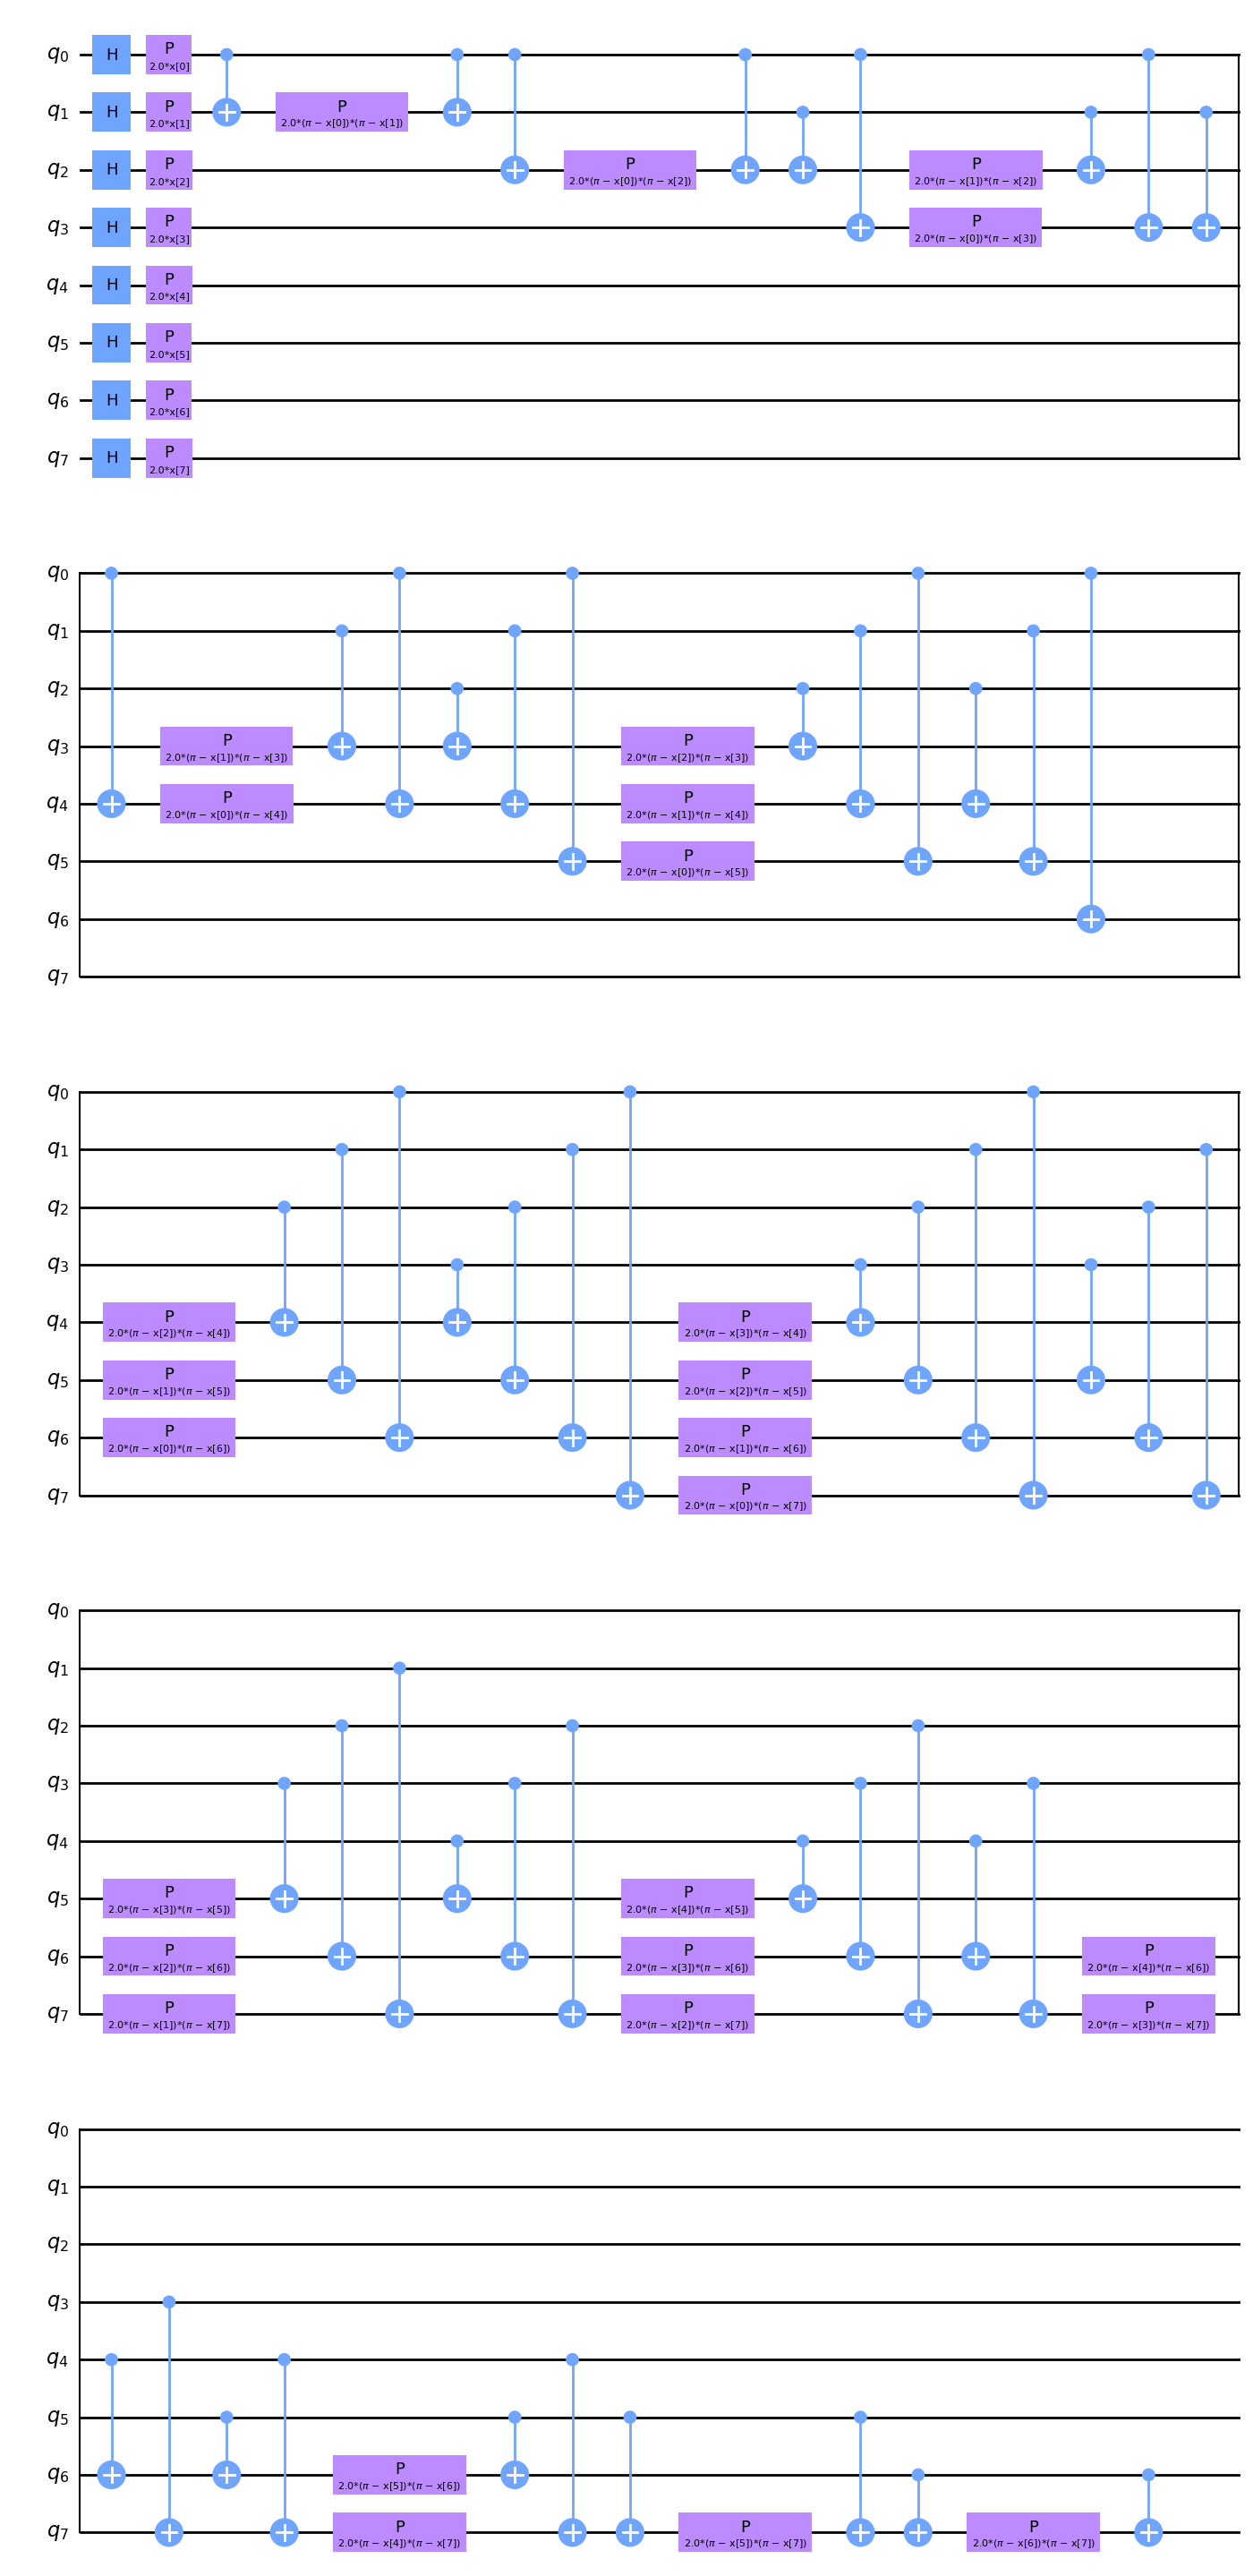

In [55]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

print(f"number of features is: {num_features}")

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

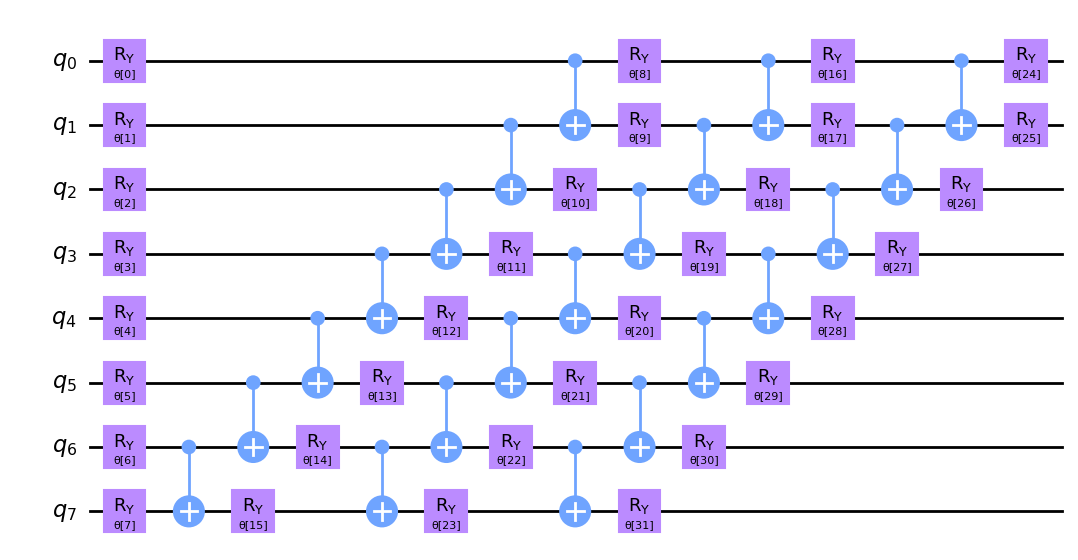

In [56]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [57]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [58]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [59]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

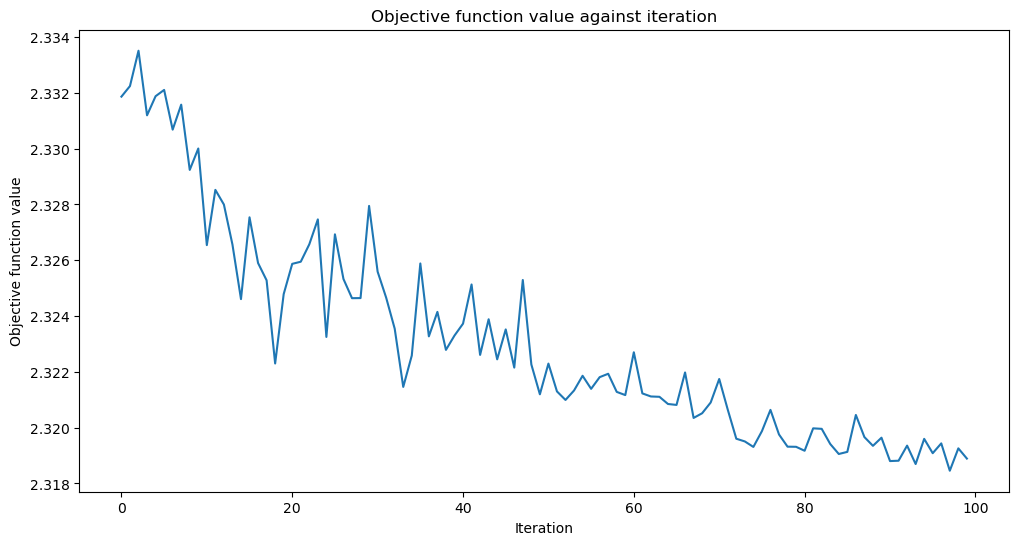

Training time: 5008 seconds


In [60]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [61]:
train_score_q4 = vqc.score(train_features, y_train)
test_score_q4 = vqc.score(test_features, y_val)
train_score_q4, test_score_q4

(0.22880583409298086, 0.20023557126030625)

In [62]:
# Save the model
model_filename = f"vqc_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(vqc, file)

NameError: name 'pickle' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Predict on training and test data
train_predictions = vqc.predict(train_features)
test_predictions = vqc.predict(test_features)

# Evaluate performance
train_score_q4 = accuracy_score(y_train, train_predictions)
test_score_q4 = accuracy_score(y_val, test_predictions)

print(f"Train Accuracy: {train_score_q4}")
print(f"Test Accuracy: {test_score_q4}")

# Compute other metrics
train_precision = precision_score(y_train, train_predictions, average='weighted')
test_precision = precision_score(y_val, test_predictions, average='weighted')

train_recall = recall_score(y_train, train_predictions, average='weighted')
test_recall = recall_score(y_val, test_predictions, average='weighted')

train_f1 = f1_score(y_train, train_predictions, average='weighted')
test_f1 = f1_score(y_val, test_predictions, average='weighted')

train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_val, test_predictions)

print(f"Train Precision: {train_precision}")
print(f"Test Precision: {test_precision}")

print(f"Train Recall: {train_recall}")
print(f"Test Recall: {test_recall}")

print(f"Train F1 Score: {train_f1}")
print(f"Test F1 Score: {test_f1}")

print(f"Train Confusion Matrix:\n{train_conf_matrix}")
print(f"Test Confusion Matrix:\n{test_conf_matrix}")